In [23]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Data
data = [(1.55, 51),
        (1.57, 50),
        (1.62, 55),
        (1.68, 52),
        (1.75, 60),
        (1.75, 68),
        (1.81, 78),
        (1.83, 91),
        (1.87, 84),
        (1.89, 81),
        (1.9, 90),
        (1.92, 105),
        (1.95, 95),
        (1.95, 99),
        (1.99, 100),
        (2.02, 101)]
x, y = zip(*data)

# Reshaping data for the model
X = np.array(x).reshape(-1, 1)
y = np.array(y)

# Create and fit the model
model = LinearRegression().fit(X, y)

# Get the coefficient and intercept of the line
slope = model.coef_[0]
intercept = model.intercept_

# Equation of the line
equation = f"y = {slope:.2f}x + {intercept:.2f}"

slope, intercept, equation

(127.18386141042825, -152.1681983733088, 'y = 127.18x + -152.17')

### LRM aus der Vorlesung 

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [122]:
def variance(data):
    sum = 0
    mean = np.mean(data)
    for i in range(len(data)):
        sum += (data[i] - mean)**2
    return sum / (len(data) - 1)

def lrm(a, b, x):
    return a + b * x

def residuals(y, x, a, b):
    res = []
    for i in range(len(y)):
        res.append(y[i] - lrm(a, b, x[i]))
    return res

def residuals_var(y, x, a, b):
    res = []
    for i in range(len(y)):
        res.append((y[i] - lrm(a, b, x[i]))**2)
    return sum(res) / (len(y) - 2)

def s_alpha2(x, var_x, var_residuals):
    return ((1 / len(x)) + (np.mean(x)**2) / ((len(x) - 1) * var_x)) * var_residuals

def s_beta2(x, var_x, var_residuals):
    return (1 / ((len(x) - 1) * var_x)) * var_residuals

In [42]:
xi = [1, 4, 5, 7, 9]
yi = [1.0, 3.1, 4.7, 4.4, 7.5]

x_mean = np.mean(xi)
y_mean = np.mean(yi)
x_var = variance(xi)
y_var = variance(yi)
s_xy = np.cov(xi, yi)[1][0]

# alpha, beta, sigma
beta = s_xy / x_var
alpha = y_mean - beta * x_mean

print(f"x_mean: {x_mean}, y_mean: {y_mean}, x_var: {x_var}, y_var: {y_var}, s_xy: {s_xy}")
print(f"alpha: {alpha}, beta: {beta} \n")
print(f"y = {alpha:.2f} + {beta:.2f}x")

x_mean: 5.2, y_mean: 4.140000000000001, x_var: 9.2, y_var: 5.6530000000000005, s_xy: 6.890000000000001
alpha: 0.24565217391304284, beta: 0.748913043478261 

y = 0.25 + 0.75x


In [43]:
Y = [lrm(alpha, beta, x) for x in np.linspace(0, 10, 100)]

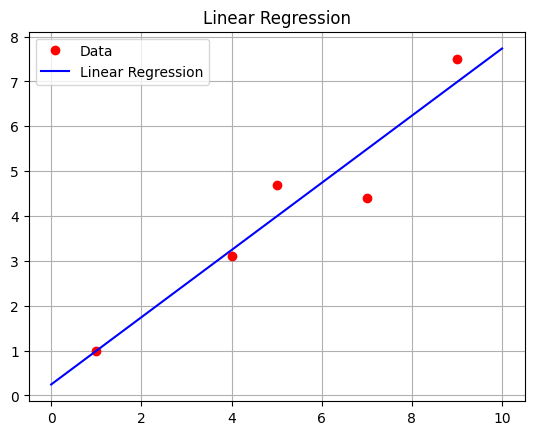

In [49]:
plt.plot(xi, yi, 'ro')
plt.plot(np.linspace(0, 10, 100), Y, 'b')
plt.legend(['Data', 'Linear Regression'])
plt.title('Linear Regression')
plt.grid()
plt.show()

In [123]:
t3_975 = 3.1824 # error 0.05
s_alpha =  s_alpha2(xi, x_var, residuals_var(yi, xi, alpha, beta))
I_alpha = [alpha - t3_975 * s_alpha**0.5, alpha + t3_975 * s_alpha**0.5]
print(f"alpha: {alpha}, s_alpha: {s_alpha}, I_alpha: {I_alpha}")

alpha: 0.24565217391304284, s_alpha: 0.6144502205419031, I_alpha: [-2.248931742816872, 2.7402360906429575]


0.682986452425961
